# Project 7: Machine Learning using Simple Linear Regression 
## Project Summary:
- **Author** Derek Graves
- **Date** 22 Feb 2024
- **GitHub Repository** https://github.com/dgraves4/datafun-07-ml
- **Purpose** This project is a series of guided learning exercises that serve to showcase the use of machine learning, and in particular, a simple type of supervised machine learning called simple linear regression to build a model, make predictions, visualize the model, and publish insights about the final product. 

## Environment Setup
This section provides a setup of the project through creating a virtual environment and installing required packages. See the Project README for detailed step-by-step instructions.

### Import Dependencies

In [1030]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import pyarrow
import scipy
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np



## Part- 1 Chart a Straight Line

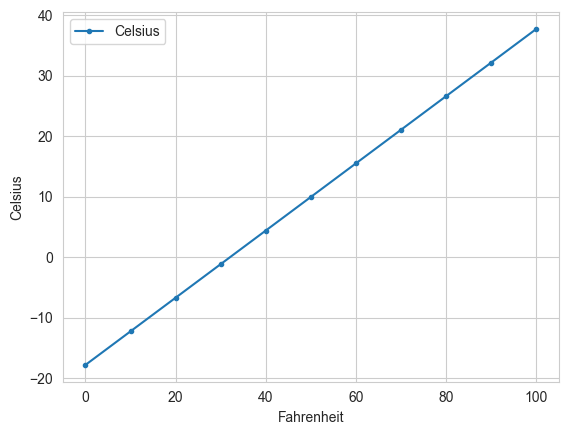

In [1031]:
# Lambda function for Fahrenheit to Celsius conversion
c = lambda f: 5/9*(f-32)

# Tupule data for temps 0-100 in 10 degree increments.
temps = temps = [(f, c(f)) for f in range(0, 101, 10)]

# Place the data in a DataFrame
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Set axis and use plot method to display relationship between Farenheit and Celsius temps 
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part- 2 Predict Avg High Temp in NYC in January 

### Section 1 - Data Acquisition

Load the New York City data from ave_hi_nyc_jan_1895-2018.csv and observe the DataFrame's head and tail:

In [1032]:
nyc_df = pd.read_csv('C:/Users/derek/OneDrive/Documents/44608 Data Analytics Fundamentals/Mod 7/datafun-07-ml/Examples/ch10/ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

Display the head and tail of the Dataframe:

In [1033]:
# Display DataFrame head: 
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [1034]:
# Display DataFrame tail:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

Rename the 'Value' column as 'Temperature' for readability:

In [1035]:
# Rename 'Value' column
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Display change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [1036]:
# Check column type
nyc_df.Date.dtype 

dtype('int64')

Make x-axis more readable by removing 01 (January).  Call Series method floordiv to perform integer division on every element:

In [1037]:
nyc_df.Date = nyc_df.Date.floordiv(100)

#Display head to verify change
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4: Descriptive Statistics

Set the display precision and get some quick statistics by calling describe on Temperature column:

In [1038]:
# Set display precision to 2 decimal places 
pd.set_option('display.precision', 2)

# Use describe() to get basic discriptive statistics and data types
nyc_df.describe()
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model 

Use the SciPy stats module linregress to calculate slope and intercept for the best fit line through the data:

In [1039]:
# Calculate regression line's slope and intercept
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

# View linegress slope and intercept values
linear_regression.slope

linear_regression.intercept



8.694993233674289

In [1040]:
# View slope value
linear_regression.slope

0.014771361132966163

In [1041]:
# View intercept value
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

Using the model, predict the "average high temp in Jan" for the year 2024:

In [1042]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

We can also use the model to predict the "average high temp in Jan" for the year 1890:

In [1043]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

### Section 7: Visualizations

Use Seaborn to generate a scatterplot of the data with a best fit line:

(10.0, 70.0)

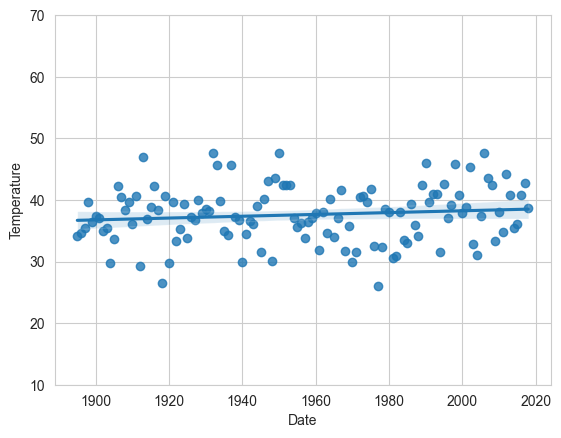

In [1044]:
# Configure Seaborn to use 'whitegrid' style for chart readablility
sns.set_style('whitegrid')

# Define x and y axis
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

# Scale y axis range to emphasize linear relationship
axes.set_ylim(10, 70)

## Part- 3 Predict Avg High Temp in NYC in January 

### Section 1: Build the Model 

Import and use test_train_split to split the data into parts for training and testing:

In [1045]:
from sklearn.model_selection import train_test_split

In [1046]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
     nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, 
     random_state=11)

Confirm the 75%-25% train-test split by checking the shapes of our sets:

In [1047]:
X_train.shape

(93, 1)

In [1048]:
X_test.shape

(31, 1)

Train the Model using Linear Regression Fit:

In [1049]:
# Import LinearRegression and train estimator
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)


LinearRegression()

View the returned coef_ and intercept_  attributes needed for the line equation (y = mx + b): 

In [1050]:
# View coefficient
linear_regression.coef_

array([0.01939167])

In [1051]:
# View intercept
linear_regression.intercept_

-0.30779820252656975

### Section 2 - Test the Model

Test the model using the data in x_test and check some predictions from the dataset:

In [1052]:
# Define predicted 
predicted = linear_regression.predict(X_test)

In [1053]:
# Define expected 
expected = y_test

In [1054]:
# Display predicted and expected values for every fifth element
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict 

Use the Model to predict the "average high temp in Jan" for the year 2024 and 1890:

In [1055]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [1056]:
predict(2024)

array([38.94094855])

In [1057]:
predict(1890)

array([36.34246432])

### Section 4 - Visualizations

Create a scatter plot of the dataset using Seaborn's scatterplot function and Matplotlib's plot function:

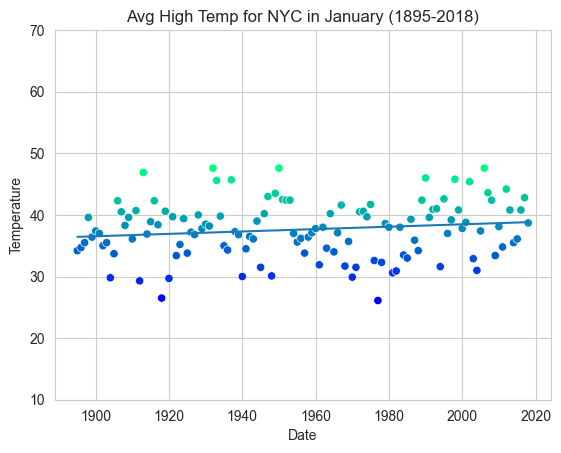

In [1058]:
# Display datapoints with scatterplot
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)

# Scale y-axis values
axes.set_ylim(10, 70)

# Generate array of 'date' x values
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

# Use predict function 
y = predict(x)

# Plot linear regression line
line = plt.plot(x, y)

# Add title to the plot for readability
axes.set_title("Avg High Temp for NYC in January (1895-2018)")

# Show plot
plt.show()



## Part 4 - Insights and Observations

This section provides some insights into the merits of using both Object-Oriented Programming and Machine learning as we've worked through the above examples:

### Object-Oriented Programming (OOP):

- **Organization and Simplification**: OOP enables the organization of real-world entities in code into reusable classes, promoting clarity and simplifying code maintenance as well as making these classes functional as well as conveniently groupable by their characteristics.

- **Inheritance and Polymorphism**: In OOP, new classes can be created with the base properties of existing "base classes". This inheritance mechanism allows us to reuse code and customize functionality of base classes easily to create "sub-classes" that can expand on the functionality of a base class, adding more flexibility to designs. Additionally, polymorphism, a key concept in OOP, enables objects of different classes to be treated as objects of a common superclass. This allows for more flexibility and promotes code reusability and extensibility.  

- **Modularity and Reusability**: OOP promotes modularity by breaking down complex systems into smaller, reusable components called classes. This enhances code reusability and maintainability, allowing for the use of smaller, well defined components to modify and build systems of further complexity.

### Machine Learning (ML):

- **Real-World Modeling**: ML can be used to predict and model data in a way that can help make decisions and predictions about future trends based on historical data and patterns.  These predictions can then be used to potentially guide future actions.

- **Feature Engineering**: ML leverages OOP principles to create reusable classes for preprocessing and feature engineering, enhancing overall reusablility, scalability and maintainability through while making feature design more intuitive. 

- **Algorithm Implementation and Evaluation**: ML libraries provide implementations of algorithms incorporated within classes, offering consistent interfaces for training, predicting, and evaluating models. Adhering to OOP principles during this process promotes code readability.

- **Model Visualization**: ML libraries such as scikit-learn offer standardized interfaces for training models, evaluating their performance using metrics like accuracy, precision, and recall, and deploying them into production environments. These interfaces provide developers with consistent methods and tools for implementing ML algorithms.

In conclusion, the comparison between Object-Oriented Programming (OOP) and Supervised Machine Learning (ML) approaches for scatter plot analysis highlights the importance of considering factors such as audience, complexity, and application requirements in choosing the approach. While OOP offers greater control over visualization elements and is well-suited for detailed statistical analysis as well as code organization and maintainability, ML excels in predictive modeling and decision-making based on data patterns. By balancing the trade-offs between complexity and interpretability, a data analyst can tailor their approach to meet the specific needs of their audience and their own personal analytical goals. Additionally, there is potential for future research and development to explore hybrid approaches that combine the strengths of both OOP and ML, as well as advancements in visualization techniques and predictive modeling algorithms. Ultimately, understanding the nuances between these approaches will empower data analysts to produce effective and impactful visualizations that can support conclusions that will drive decision making processes.



